In [126]:
from __future__ import division
from keras.layers import Input, Activation, Dense, Flatten, MaxPooling2D
from keras.layers.convolutional import Conv2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.layers.merge import add
from keras.regularizers import l2
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import os, sys, shutil

In [127]:
input_layer = Input(shape=(64,64,3))
conv1_1 = Conv2D(filters=64,kernel_size=(7,7),strides=(3,3), kernel_initializer="he_normal",kernel_regularizer=l2(1e-4))(input_layer)
batchNormal1 = BatchNormalization(axis=3)(conv1_1)
activation1 = Activation('relu')(batchNormal1)
mp2d1 = MaxPooling2D((3,3),strides=(2,2), padding="same")(activation1)

conv2_1 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same")(mp2d1)
batchNormal2 = BatchNormalization(axis = 3)(conv2_1)
activation2 = Activation('relu')(batchNormal2)
conv2_2 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same")(activation2)

res1_batchNormal1_1 = BatchNormalization(axis = 3)(mp2d1)
res1_relu1_1 = Activation('relu')(res1_batchNormal1_1)
res1_conv1_1 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same")(res1_relu1_1)
res1_batchNormal1_2 = BatchNormalization(axis = 3)(res1_conv1_1)
res1_relu1_2 = Activation('relu')(res1_batchNormal1_2)
res1_conv1_2 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same")(res1_relu1_2)

input_shape = K.int_shape(conv2_2)
residual_shape = K.int_shape(res1_conv1_2)
stride_width = int(round(input_shape[1] / residual_shape[2]))
stride_height = int(round(input_shape[2] / residual_shape[1]))
equal_channels = input_shape[3]

shortcut = conv2_2
if stride_width > 1 or stride_height > 1 or not equal_channels :
    shortcut = Conv2D(filters = residual_shape[3], 
                      kernel_size=(1,1),
                      strides=(strides_width, strides_height),
                      padding=("valid"),
                      kernel_initializer = "he_normal",
                      kernel_regularizer = l2(0.0001))(conv2_2)

block1 = add([shortcut, res1_conv1_2])
#model = Model(inputs=input_layer, outputs=block1)
#model.summary()
#input_layer 와 1번째 residual block

In [128]:


conv3_1 = Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding="same")(block1)
batchNormal3 = BatchNormalization(axis = 3)(conv3_1)
activation3 = Activation('relu')(batchNormal3)
conv3_2 = Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding="same")(activation3)

res2_batchNormal2_1 = BatchNormalization(axis = 3)(block1)
res2_relu2_1 = Activation('relu')(res2_batchNormal2_1)
res2_conv2_1 = Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding="same")(res2_relu2_1)
res2_batchNormal2_2 = BatchNormalization(axis = 3)(res2_conv2_1)
res2_relu2_2 = Activation('relu')(res2_batchNormal2_2)
res2_conv2_2 = Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding="same")(res2_relu2_2)

input_shape = K.int_shape(conv3_2)
residual_shape = K.int_shape(res2_conv2_2)
stride_width = int(round(input_shape[1] / residual_shape[2]))
stride_height = int(round(input_shape[2] / residual_shape[1]))
equal_channels = input_shape[3]

shortcut = conv3_2

if stride_width > 1 or stride_height > 1 or not equal_channels :
    shortcut = Conv2D(filters = residual_shape[3], 
                      kernel_size=(1,1),
                      strides=(strides_width, strides_height),
                      padding=("valid"),
                      kernel_initializer = "he_normal",
                      kernel_regularizer = l2(0.0001))(conv2_2)

block2 = add([shortcut, res2_conv2_2])

#model = Model(inputs=input_layer, outputs=block2)
#model.summary()
#2번째 residual block

In [129]:

conv4_1 = Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same")(block2)
batchNormal4 = BatchNormalization(axis = 3)(conv4_1)
activation4 = Activation('relu')(batchNormal4)
conv4_2 = Conv2D(filters=256,kernel_size=(3,3),strides=(2,2),padding="same")(activation4)

res3_batchNormal3_1 = BatchNormalization(axis = 3)(block2)
res3_relu3_1 = Activation('relu')(res3_batchNormal3_1)
res3_conv3_1 = Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same")(res3_relu3_1)
res3_batchNormal3_2 = BatchNormalization(axis = 3)(res3_conv3_1)
res3_relu3_2 = Activation('relu')(res3_batchNormal3_2)
res3_conv3_2 = Conv2D(filters=256,kernel_size=(3,3),strides=(2,2),padding="same")(res3_relu3_2)

input_shape = K.int_shape(conv4_2)
residual_shape = K.int_shape(res3_conv3_2)
stride_width = int(round(input_shape[1] / residual_shape[2]))
stride_height = int(round(input_shape[2] / residual_shape[1]))
equal_channels = input_shape[3]

shortcut = conv4_2

if stride_width > 1 or stride_height > 1 or not equal_channels :
    shortcut = Conv2D(filters = residual_shape[3], 
                      kernel_size=(1,1),
                      strides=(strides_width, strides_height),
                      padding=("valid"),
                      kernel_initializer = "he_normal",
                      kernel_regularizer = l2(0.0001))(conv2_2)

block3 = add([shortcut, res3_conv3_2])

#model = Model(inputs=input_layer, outputs=block3)
#model.summary()
#3번째 residual block

In [130]:

conv5_1 = Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="same")(block3)
batchNormal5 = BatchNormalization(axis = 3)(conv5_1)
activation5 = Activation('relu')(batchNormal5)
conv5_2 = Conv2D(filters=512,kernel_size=(3,3),strides=(2,2),padding="same")(activation5)

res4_batchNormal4_1 = BatchNormalization(axis = 3)(block3)
res4_relu4_1 = Activation('relu')(res4_batchNormal4_1)
res4_conv4_1 = Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="same")(res4_relu4_1)
res4_batchNormal4_2 = BatchNormalization(axis = 3)(res4_conv4_1)
res4_relu4_2 = Activation('relu')(res4_batchNormal4_2)
res4_conv4_2 = Conv2D(filters=512,kernel_size=(3,3),strides=(2,2),padding="same")(res4_relu4_2)

input_shape = K.int_shape(conv5_2)
residual_shape = K.int_shape(res3_conv3_2)
stride_width = int(round(input_shape[1] / residual_shape[2]))
stride_height = int(round(input_shape[2] / residual_shape[1]))
equal_channels = input_shape[3]

shortcut = conv5_2

if stride_width > 1 or stride_height > 1 or not equal_channels :
    shortcut = Conv2D(filters = residual_shape[3], 
                      kernel_size=(1,1),
                      strides=(strides_width, strides_height),
                      padding=("valid"),
                      kernel_initializer = "he_normal",
                      kernel_regularizer = l2(0.0001))(conv2_2)

final_block = add([shortcut, res4_conv4_2])

#model = Model(inputs=input_layer, outputs=final_block)
#model.summary()
#4번째 마지막 residual block

In [131]:
batchNormal6 = BatchNormalization(axis = 3)(final_block)
activation6 = Activation('relu')(batchNormal6)

last_shape = K.int_shape(activation6)
avg_p_2d = AveragePooling2D(pool_size = (last_shape[1],last_shape[2]), strides=(1,1))(activation6)
flatten = Flatten()(avg_p_2d)
dense = Dense(units = 256, kernel_initializer="he_normal", activation="relu")(flatten)
dense2 = Dense(units = 128, activation="relu")(dense)
dense3 = Dense(units = 2, activation="softmax")(dense2)
model = Model(inputs=input_layer, outputs=dense3)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_146 (Conv2D)             (None, 20, 20, 64)   9472        input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_124 (BatchN (None, 20, 20, 64)   256         conv2d_146[0][0]                 
__________________________________________________________________________________________________
activation_124 (Activation)     (None, 20, 20, 64)   0           batch_normalization_124[0][0]    
__________________________________________________________________________________________________
max_poolin

In [132]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True    
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)



train_generator = train_datagen.flow_from_directory(
    'smile_Refining/train',
    target_size = (64,64),
    batch_size = 16,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    'smile_Refining/validation',
    target_size = (64,64),
    batch_size = 16,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    'smile_Refining/test',
    target_size = (64,64),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 1213 images belonging to 2 classes.
Found 209 images belonging to 2 classes.
Found 190 images belonging to 2 classes.


In [133]:
total_generator = (len(train_generator)+ len(validation_generator)+len(test_generator))*16


In [134]:
from keras import optimizers
adam_optimizer = optimizers.Adam(lr = 0.005)
sgd_optimizer = optimizers.SGD(lr=0.001, momentum=0.9,nesterov=False)
model.compile(loss= 'categorical_crossentropy',
             optimizer ='adam',
             metrics=['accuracy'])

In [135]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=total_generator / 16,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=20
)

Epoch 1/100
102/102 [==============================] - 9s 84ms/step - loss: 0.7049 - acc: 0.5901 - val_loss: 0.5312 - val_acc: 0.7115
Epoch 2/100
102/102 [==============================] - 2s 18ms/step - loss: 0.6286 - acc: 0.6603 - val_loss: 1.9992 - val_acc: 0.5049
Epoch 3/100
102/102 [==============================] - 2s 19ms/step - loss: 0.5668 - acc: 0.7201 - val_loss: 0.4840 - val_acc: 0.7517
Epoch 4/100
102/102 [==============================] - 2s 19ms/step - loss: 0.4838 - acc: 0.7804 - val_loss: 1.0398 - val_acc: 0.7049
Epoch 5/100
102/102 [==============================] - 2s 19ms/step - loss: 0.4722 - acc: 0.8018 - val_loss: 1.6966 - val_acc: 0.5931
Epoch 6/100
102/102 [==============================] - 2s 20ms/step - loss: 0.4056 - acc: 0.8388 - val_loss: 0.8644 - val_acc: 0.5049
Epoch 7/100
102/102 [==============================] - 2s 20ms/step - loss: 0.3518 - acc: 0.8576 - val_loss: 0.7583 - val_acc: 0.5586
Epoch 8/100
102/102 [==============================] - 2s 20ms

Epoch 62/100
102/102 [==============================] - 2s 19ms/step - loss: 0.1095 - acc: 0.9655 - val_loss: 0.3061 - val_acc: 0.9148
Epoch 63/100
102/102 [==============================] - 2s 20ms/step - loss: 0.1172 - acc: 0.9680 - val_loss: 0.2963 - val_acc: 0.9000
Epoch 64/100
102/102 [==============================] - 2s 20ms/step - loss: 0.0971 - acc: 0.9712 - val_loss: 0.2984 - val_acc: 0.9049
Epoch 65/100
102/102 [==============================] - 2s 20ms/step - loss: 0.1063 - acc: 0.9702 - val_loss: 0.7965 - val_acc: 0.7508
Epoch 66/100
102/102 [==============================] - 2s 20ms/step - loss: 0.1161 - acc: 0.9669 - val_loss: 0.6706 - val_acc: 0.8069
Epoch 67/100
102/102 [==============================] - 2s 20ms/step - loss: 0.1180 - acc: 0.9600 - val_loss: 0.4026 - val_acc: 0.8689
Epoch 68/100
102/102 [==============================] - 2s 20ms/step - loss: 0.1149 - acc: 0.9608 - val_loss: 0.3020 - val_acc: 0.9241
Epoch 69/100
102/102 [==============================] -

loss :  0.17599682602694014
acc :  0.9350449985573036

val_loss :  0.47643980372989087
val_acc :  0.8428586772187677

max acc :  0.9778597787077576
max val_acc :  0.9377049180327869


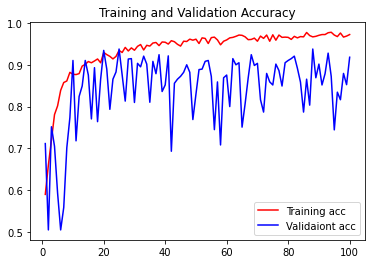

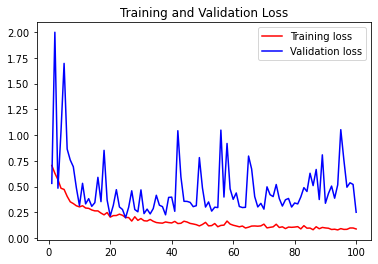

In [137]:
import matplotlib.pyplot as plt
import numpy as np
model.save_weights('19_try_2class.h5')
history_data = history.history
history_data.keys()

loss = history_data['loss']
acc = history_data['acc']
val_loss = history_data['val_loss']
val_acc = history_data['val_acc']

print("loss : ", np.mean(loss))
print("acc : ", np.mean(acc))
print()
print("val_loss : ", np.mean(val_loss))
print("val_acc : ", np.mean(val_acc))
print()
print("max acc : ", np.max(acc))
print("max val_acc : ", np.max(val_acc))


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validaiont acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [138]:
scores = model.evaluate_generator(test_generator, steps=5,verbose=1)
for i in range(len(scores)):
    print("%s : %0.2f"%(model.metrics_names[i], scores[i]))

5/5 [==============================] - 0s 11ms/step
loss : 0.54
acc : 0.86
